In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import healpy as hp
from healpy.visufunc import projplot
import astropy.units as u
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools
from dipole import cmb_dipole, get_dipole
from Secrest_dipole import SecrestDipole

In [3]:
# load Quaia
quaiatab = Table.read('/scratch/aew492/quasars/catalogs/quaia/quaia_G20.0.fits', format='fits')

In [4]:
quaiatab

source_id,unwise_objid,redshift_quaia,redshift_quaia_err,ra,dec,l,b,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,mag_w1_vg,mag_w2_vg,pm,pmra,pmdec,pmra_error,pmdec_error
,,,,deg,deg,deg,deg,mag,mag,mag,mag,mag,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr
int64,bytes16,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float32,float32
10892037246720,0453p000o0015876,1.7364680767059326,0.09870262884140013,45.18857525358218,0.28242442525431893,176.85154355262011,-48.5708559360798,18.78724,19.080688,18.240915,15.21995,13.868094,0.15540553490476286,-0.09803741741546984,-0.12058003593273806,0.257395,0.22310686
15839839588736,0453p000o0017020,1.5130492448806763,0.07810206890106197,45.189480360571665,0.3591947400894022,176.76912910053676,-48.51684235773577,18.888464,19.17128,18.50937,15.317786,14.013617,0.44892476891575755,-0.31608849256513893,0.31878129338774636,0.36059502,0.3265819
22780506725760,0453p000o0016209,2.852853775024414,0.07791999999999999,44.79936522932521,0.30355729158111383,176.4176643816323,-48.83530904204095,19.218422,19.48634,18.8145,16.027142,15.041919,0.5232111830158942,0.16823689536016173,0.495425361757415,0.36143935,0.269473
29102698617216,0453p000o0018124,1.7234398126602173,0.5431374826049805,45.07952191471843,0.43963647300547504,176.56632979004348,-48.539725067910446,19.837416,20.162195,19.387741,16.1484,14.913529,0.23629231353887195,0.13363335786463076,-0.19487478827025342,0.5716444,0.4993483
35115652874752,0453p000o0020193,0.803479790687561,0.07041599310874941,44.99106740350177,0.5817285409510972,176.31953253315504,-48.5037567938138,18.863981,19.050497,18.467363,14.405685,13.324464,0.20279393581240557,0.2025059976484399,-0.010802838455522882,0.22700854,0.22789434
45389214407424,0453p000o0019307,2.5434763431549072,0.08197140930175784,45.46314576335495,0.5223631031122293,176.87877917393385,-48.206673850472285,19.413044,19.660446,19.003618,16.437666,15.40919,0.8804402473639416,0.029875722687410865,0.8799332192684758,0.3681689,0.3576673
47931835055360,0453p000o0020960,1.036263346672058,0.09770209781646733,45.61545491514258,0.6311201802539346,176.9198990209358,-48.021551935865055,19.366932,19.695724,18.919903,15.398229,14.092303,0.2047768078318446,0.15813672856887673,0.13010117641026012,0.37432006,0.3599602
52158083142400,0453p000o0027329,2.338984727859497,0.3489484640312195,45.47519075007384,0.6924331071569837,176.70812720970287,-48.07977909142659,19.99409,20.349648,19.550968,16.712006,15.566061,1.4764786653690734,-1.3982448451759357,-0.4742368630009311,0.6254234,0.69609946


In [5]:
mastertab = Table.read('/scratch/aew492/quasars/catalogs/quaia/quaia_G20.0_master.fits', format='fits')

In [6]:
mastertab

source_id,unwise_objid,redshift_quaia,redshift_quaia_err,ra,dec,l,b,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,mag_w1_vg,mag_w2_vg,pm,pmra,pmdec,pmra_error,pmdec_error,primrad,secrad,pa
,,,,deg,deg,deg,deg,mag,mag,mag,mag,mag,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,
int64,bytes16,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64
10892037246720,0453p000o0015876,1.7364680767059326,0.09870262884140013,45.18857525358218,0.28242442525431893,176.85154355262011,-48.5708559360798,18.78724,19.080688,18.240915,15.21995,13.868094,0.15540553490476286,-0.09803741741546984,-0.12058003593273806,0.257395,0.22310686,0.0,0.0,0.0
15839839588736,0453p000o0017020,1.5130492448806763,0.07810206890106197,45.189480360571665,0.3591947400894022,176.76912910053676,-48.51684235773577,18.888464,19.17128,18.50937,15.317786,14.013617,0.44892476891575755,-0.31608849256513893,0.31878129338774636,0.36059502,0.3265819,0.0,0.0,0.0
22780506725760,0453p000o0016209,2.852853775024414,0.07791999999999999,44.79936522932521,0.30355729158111383,176.4176643816323,-48.83530904204095,19.218422,19.48634,18.8145,16.027142,15.041919,0.5232111830158942,0.16823689536016173,0.495425361757415,0.36143935,0.269473,0.0,0.0,0.0
29102698617216,0453p000o0018124,1.7234398126602173,0.5431374826049805,45.07952191471843,0.43963647300547504,176.56632979004348,-48.539725067910446,19.837416,20.162195,19.387741,16.1484,14.913529,0.23629231353887195,0.13363335786463076,-0.19487478827025342,0.5716444,0.4993483,0.0,0.0,0.0
35115652874752,0453p000o0020193,0.803479790687561,0.07041599310874941,44.99106740350177,0.5817285409510972,176.31953253315504,-48.5037567938138,18.863981,19.050497,18.467363,14.405685,13.324464,0.20279393581240557,0.2025059976484399,-0.010802838455522882,0.22700854,0.22789434,0.0,0.0,0.0
45389214407424,0453p000o0019307,2.5434763431549072,0.08197140930175784,45.46314576335495,0.5223631031122293,176.87877917393385,-48.206673850472285,19.413044,19.660446,19.003618,16.437666,15.40919,0.8804402473639416,0.029875722687410865,0.8799332192684758,0.3681689,0.3576673,0.0,0.0,0.0
47931835055360,0453p000o0020960,1.036263346672058,0.09770209781646733,45.61545491514258,0.6311201802539346,176.9198990209358,-48.021551935865055,19.366932,19.695724,18.919903,15.398229,14.092303,0.2047768078318446,0.15813672856887673,0.13010117641026012,0.37432006,0.3599602,0.0,0.0,0.0
52158083142400,0453p000o0027329,2.338984727859497,0.3489484640312195,45.47519075007384,0.6924331071569837,176.70812720970287,-48.07977909142659,19.99409,20.349648,19.550968,16.712006,15.566061,1.4764786653690734,-1.3982448451759357,-0.4742368630009311,0.6254234,0.69609946,0.0,0.0,0.0


In [7]:
mastermap = tools.load_catalog_as_map(mastertab, NSIDE=64)
mastermap[mastermap==0.] = np.nan

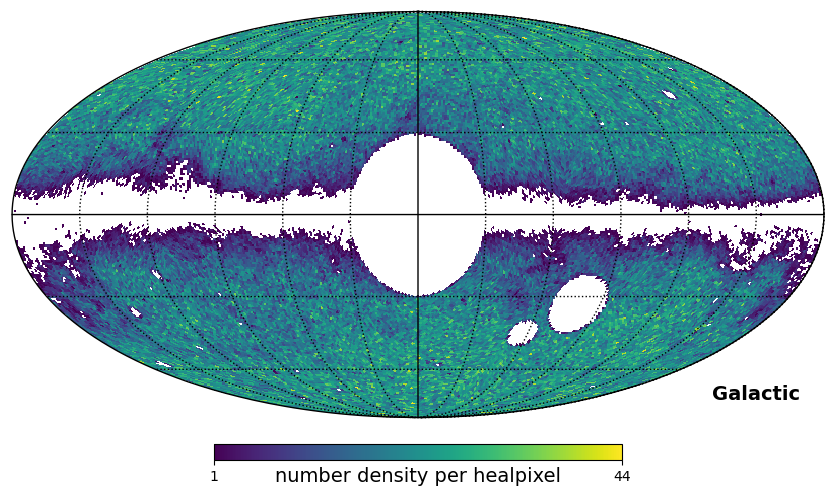

In [8]:
tools.mollview(mastermap, coord=['C','G'], badcolor='white')

### compute dipole

In [9]:
d = SecrestDipole(catname='quaia', mag='G', maglim=20.0, blim=30, load_init=False)
map_d = d.load_hpxelatcorr()

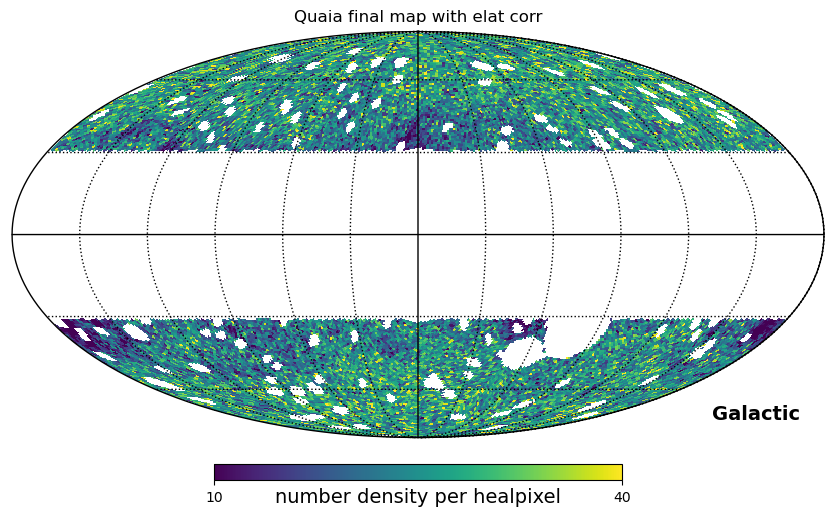

In [10]:
d.plot_map(map_d, title='Quaia final map with elat corr', min=10, max=40)

In [12]:
damp, ddir = d.compute_dipole(map_d, verbose=True)

amp = 0.051132
direction:  <SkyCoord (Galactic): (l, b) in deg
    (265.93418003, 28.28792519)>


In [13]:
# smooth map
d.smooth_map()

smoothing density-corrected map...
loaded smoothed map from /scratch/aew492/quasars/catalogs/quaia/quaia_G20.0_blim30/quaia_hpx_smoothed.fits


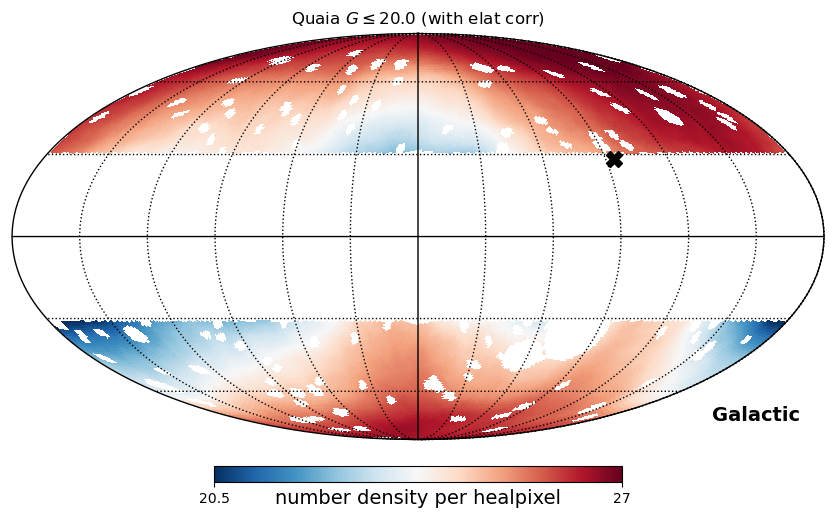

In [14]:
d.plot_map(d.hpx_smoothed, key='smoothed', cmap='RdBu_r', min=20.5, max=27., title='Quaia $G\leq 20.0$ (with elat corr)')
projplot(np.pi/2 * u.rad - ddir.b.to(u.rad).wrap_at(np.pi * u.rad), ddir.l.to(u.rad).wrap_at(np.pi * u.rad),
         marker='X', ms=12, color='k')

### compare to Secrest

In [15]:
dSec = SecrestDipole(catname='catwise_agns', mag='w1', maglim=16.4, blim=30, load_init=False)
mapSec = dSec.load_hpxelatcorr()

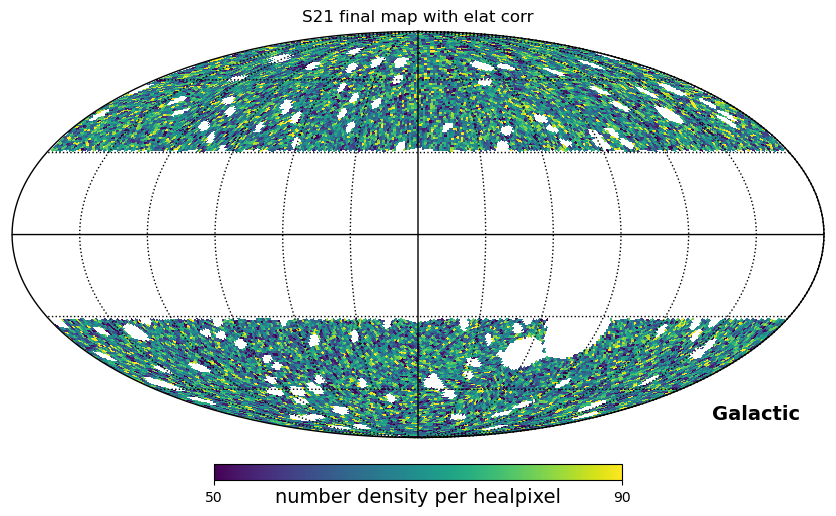

In [16]:
dSec.plot_map(mapSec, title='S21 final map with elat corr', min=50, max=90)

In [17]:
dSec_amp, dSec_dir = dSec.compute_dipole(mapSec, verbose=True)

amp = 0.014749
direction:  <SkyCoord (Galactic): (l, b) in deg
    (239.89586344, 28.75049819)>


In [18]:
dSec.smooth_map()

smoothing density-corrected map...
loaded smoothed map from /scratch/aew492/quasars/catalogs/catwise_agns/catwise_agns_w116.4_blim30/catwise_agns_hpx_smoothed.fits


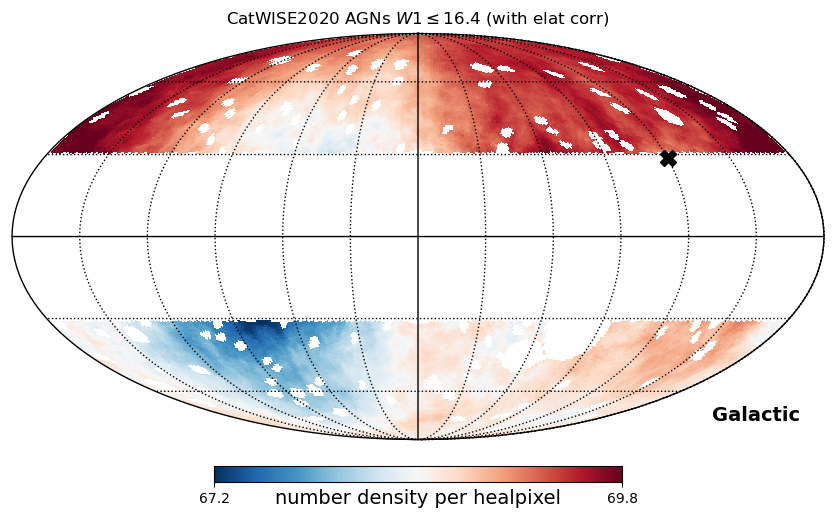

In [19]:
dSec.plot_map(dSec.hpx_smoothed, key='smoothed', cmap='RdBu_r', min=67.2, max=69.8, graticule=True,
             title='CatWISE2020 AGNs $W1\leq 16.4$ (with elat corr)')
projplot(np.pi/2 * u.rad - dSec_dir.b.to(u.rad).wrap_at(np.pi * u.rad), dSec_dir.l.to(u.rad).wrap_at(np.pi * u.rad),
         marker='X', ms=12, color='k')

### $|b|>50^\circ$

#### Quaia

In [20]:
d50 = SecrestDipole(catname='quaia', mag='G', maglim=20., blim=50, load_init=False)
map50 = d50.load_hpxelatcorr()

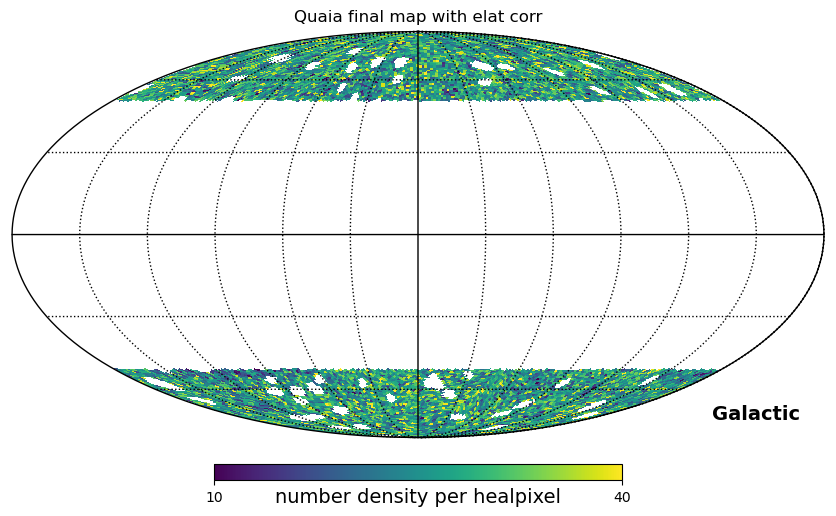

In [21]:
d50.plot_map(map50, title='Quaia final map with elat corr', min=10, max=40)

In [22]:
d50_amp, d50_dir = d50.compute_dipole(map50, verbose=True)

amp = 0.031638
direction:  <SkyCoord (Galactic): (l, b) in deg
    (256.38832823, 19.10013922)>


In [23]:
d50.smooth_map()

smoothing density-corrected map...
loaded smoothed map from /scratch/aew492/quasars/catalogs/quaia/quaia_G20.0_blim50/quaia_hpx_smoothed.fits


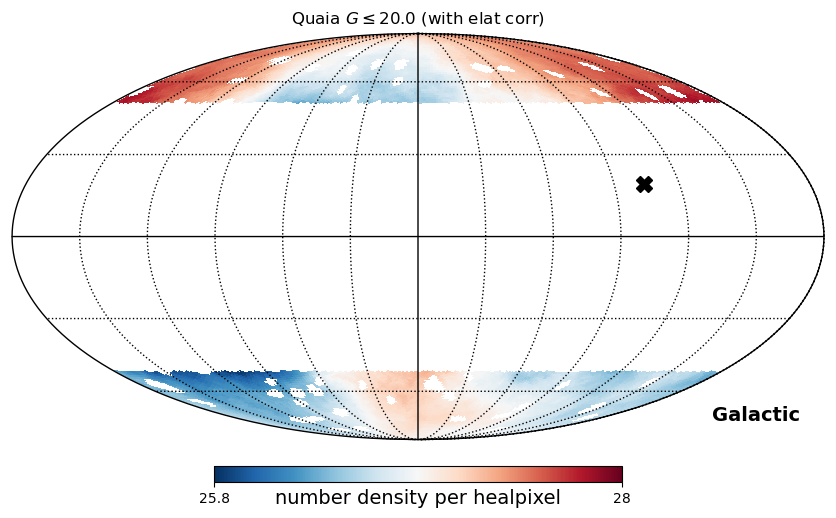

In [24]:
d50.plot_map(d50.hpx_smoothed, key='smoothed', cmap='RdBu_r', min=25.8, max=28., title='Quaia $G\leq 20.0$ (with elat corr)')
projplot(np.pi/2 * u.rad - d50_dir.b.to(u.rad).wrap_at(np.pi * u.rad), d50_dir.l.to(u.rad).wrap_at(np.pi * u.rad),
         marker='X', ms=12, color='k')

#### S21

In [25]:
dSec50 = SecrestDipole(catname='catwise_agns', mag='w1', maglim=16.4, blim=50, load_init=False)
mapSec50 = dSec50.load_hpxelatcorr()

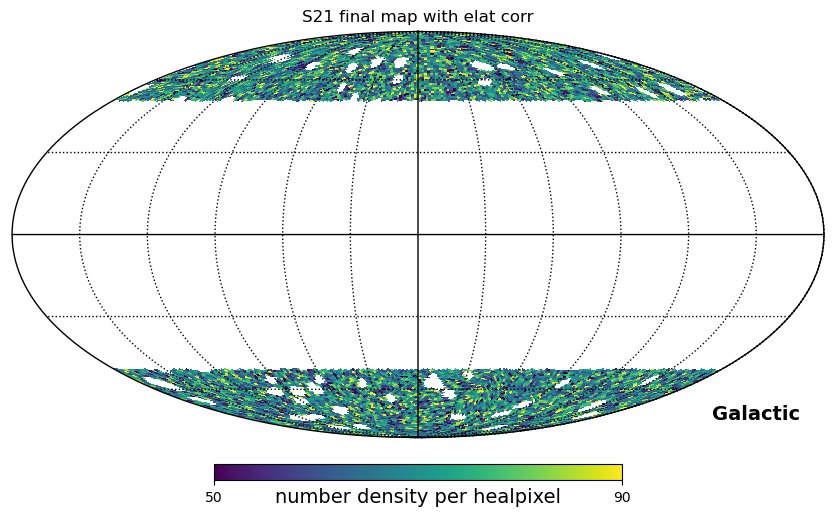

In [26]:
dSec50.plot_map(mapSec50, title='S21 final map with elat corr', min=50, max=90)

In [27]:
dSec50_amp, dSec50_dir = dSec50.compute_dipole(mapSec50, verbose=True)

amp = 0.012248
direction:  <SkyCoord (Galactic): (l, b) in deg
    (225.64041335, 31.37093)>


In [28]:
dSec50.smooth_map()

smoothing density-corrected map...
loaded smoothed map from /scratch/aew492/quasars/catalogs/catwise_agns/catwise_agns_w116.4_blim50/catwise_agns_hpx_smoothed.fits


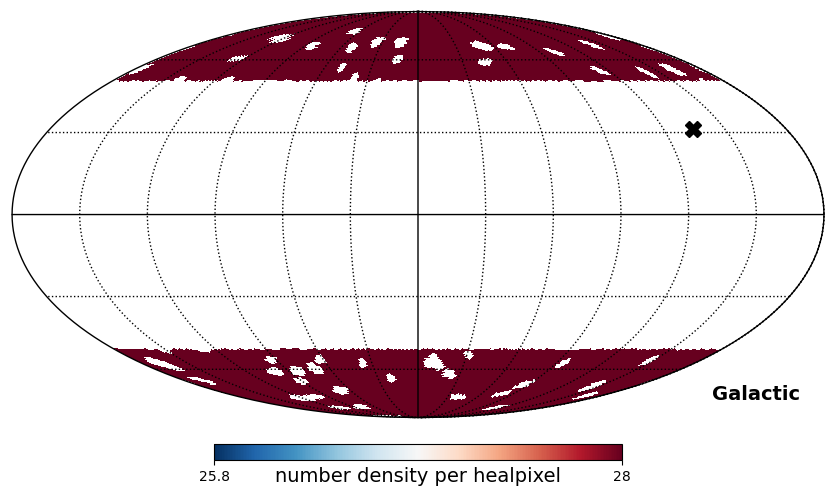

In [40]:
dSec50.plot_map(dSec50.hpx_smoothed, key='smoothed', cmap='RdBu_r', min=25.8, max=28.)
projplot(np.pi/2 * u.rad - dSec50_dir.b.to(u.rad).wrap_at(np.pi * u.rad), dSec50_dir.l.to(u.rad).wrap_at(np.pi * u.rad),
         marker='X', ms=12, color='k')

### try correcting Quaia master map by selection function

In [29]:
# load selection function
selfunc = tools.flatten_map(Table.read('/scratch/aew492/quasars/catalogs/quaia/selection_function_NSIDE64_G20.0.fits'))

In [30]:
quaia_corr = np.full(len(mastermap), np.nan)
quaia_corr = np.divide(mastermap, selfunc, out=quaia_corr, where=~np.isnan(mastermap))

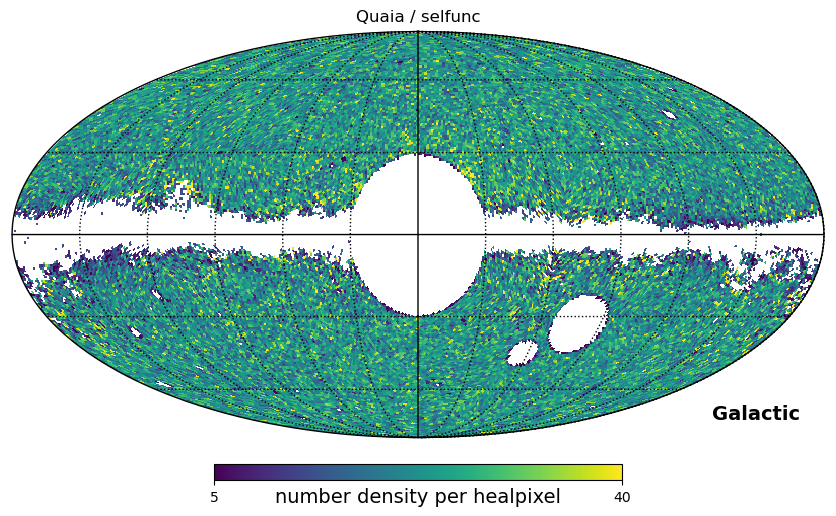

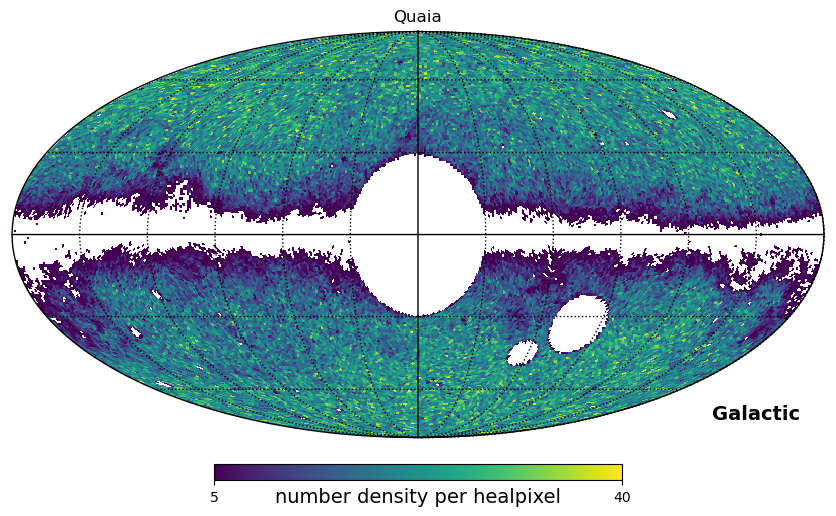

In [31]:
kwargs = dict(coord=['C','G'], badcolor='white', min=5, max=40)
tools.mollview(quaia_corr, title='Quaia / selfunc', **kwargs)
tools.mollview(mastermap, title='Quaia', **kwargs)

In [34]:
d30compcorr = SecrestDipole(catname='quaia', mag='G', maglim=20., blim=30, compcorrect=True, load_init=False)
map30compcorr = d30compcorr.load_hpxelatcorr()

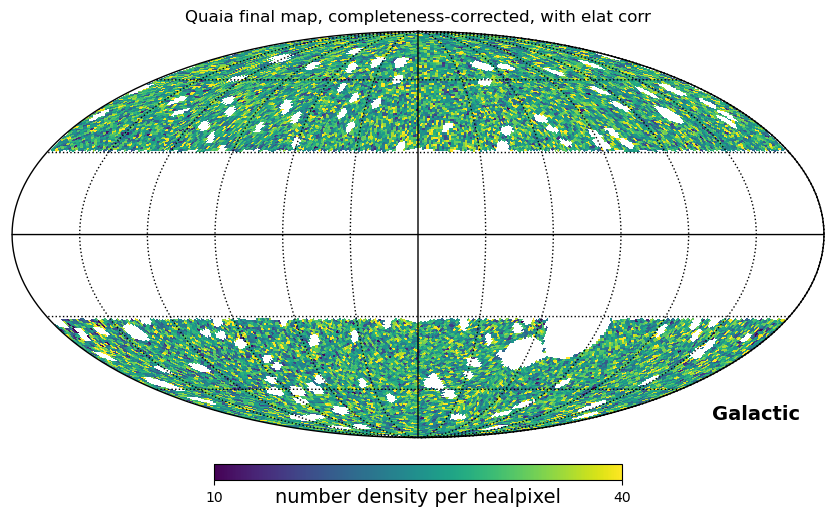

In [36]:
d30compcorr.plot_map(map30compcorr, title='Quaia final map, completeness-corrected, with elat corr', min=10, max=40)

In [37]:
d30compcorr_amp, d30compcorr_dir = d30compcorr.compute_dipole(map30compcorr, verbose=True)

amp = 0.021333
direction:  <SkyCoord (Galactic): (l, b) in deg
    (308.08565405, 23.38902933)>


In [38]:
d30compcorr.smooth_map()

smoothing density-corrected map...
loaded hpxelatcorr
saved smoothed map to /scratch/aew492/quasars/catalogs/quaia/quaia_G20.0_blim30/comp-corrected/quaia_hpx_smoothed.fits


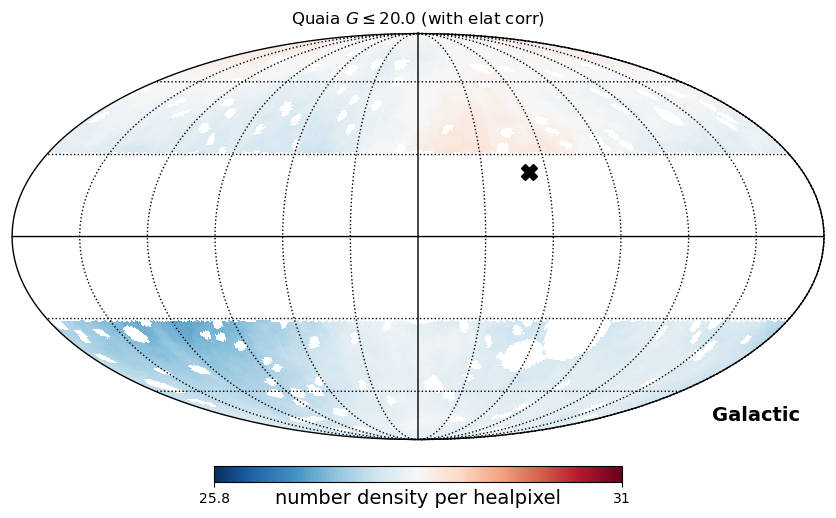

In [42]:
d30compcorr.plot_map(d30compcorr.hpx_smoothed, key='smoothed', cmap='RdBu_r', min=25.8, max=31., title='Quaia $G\leq 20.0$ (with elat corr)')
projplot(np.pi/2 * u.rad - d30compcorr_dir.b.to(u.rad).wrap_at(np.pi * u.rad), d30compcorr_dir.l.to(u.rad).wrap_at(np.pi * u.rad),
         marker='X', ms=12, color='k')

In [51]:
get_dipole(cmb_dipole(frame='galactic'))

(0.007000000000000001,
 <SkyCoord (ICRS): (ra, dec) in deg
     (264., 48.)>)